<a href="https://colab.research.google.com/github/pradeepfckumar/Neural-Network-Breast-Cancer-Prediction/blob/main/Neural_Network_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Google Colab file demonstrates the process of building and training a neural network model to predict breast cancer. It covers data loading, preprocessing (including handling missing values and encoding categorical data), splitting data into training and testing sets, applying feature scaling using StandardScaler, defining and compiling a Keras sequential model, training the model with and without scaling to show its impact, visualizing the model's performance (accuracy and loss), evaluating the model on test data, and finally, building a predictive system to classify new input data as 'Malignant' or 'Benign

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv(r'/content/Breast_Cancer Dataset.csv')
data.columns
data.drop('Unnamed: 32', axis=1, inplace=True)
data.drop(['id',],axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})
data

/tmp/ipython-input-2135415003.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.groupby('diagnosis').mean()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Splitting Dataset into Train and Test
X = data.drop(columns='diagnosis',axis=1)
Y = data['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
# Using Standardising Scaler
# fit() calculates mean & std_dev for each column) in X_train data. It learns the scaling parameters from the training data.
# transform() uses these learned means and standard deviations to scale the X_train data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Input Layer >> Hidden Layer >> Output Layer
# Importing Tensor Flow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
# Setting up the layer of Neural Network
# In the Flatten Layer input is 30 because of the Number of columns are 30. This is our input layer.
# In the Dense layer 1 with relu fuction we can choose as per the need. This is our Hidden layer
# In the Dense layer 2 with sigmoid function input is 2 bcuz of the diagnosis columns class M and B which we have converted into 0 and 1. This is our Output layer

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the Neural Network
# Using sparse_categorical_crossentropy loss function when you have Label Enconding [M=0, B=1]
# Using categorical_crossentropy loss function when you have One Hot Enconding [M=[1,0], B=[0,1]
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the Neural Network
# Epochs means How many times you want your model to go through the data for training
Hist = model.fit(X_train,Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6500 - loss: 40.5961 - val_accuracy: 0.6522 - val_loss: 5.6987
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6204 - loss: 7.5832 - val_accuracy: 0.6522 - val_loss: 3.3143
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6355 - loss: 3.9705 - val_accuracy: 0.6522 - val_loss: 1.8548
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6427 - loss: 2.2616 - val_accuracy: 0.6522 - val_loss: 1.5256
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6500 - loss: 2.0345 - val_accuracy: 0.6522 - val_loss: 1.3849
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6427 - loss: 1.5650 - val_accuracy: 0.6522 - val_loss: 1.0037
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6500 - loss: 1.2040 - val_accuracy: 0.6522 - val_loss: 0.7949
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6500 - loss: 1.0890 - val_accuracy: 0.6522 - val_los

In [ ]:
# Train the Neural Network after used standard scaler
# So here we get 95% accuracy score from 64% as per last
# Epochs means How many times you want your model to go through the data for training
Hist = model.fit(X_train_std,Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2921 - loss: 0.9836 - val_accuracy: 0.8261 - val_loss: 0.5364
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8085 - loss: 0.5049 - val_accuracy: 0.9348 - val_loss: 0.3234
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8785 - loss: 0.3316 - val_accuracy: 0.9348 - val_loss: 0.2529
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8990 - loss: 0.2609 - val_accuracy: 0.9348 - val_loss: 0.2184
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9132 - loss: 0.2214 - val_accuracy: 0.9348 - val_loss: 0.1965
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9161 - loss: 0.1961 - val_accuracy: 0.9565 - val_loss: 0.1807
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9197 - loss: 0.1779 - val_accuracy: 0.9565 - val_loss: 0.1684
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9266 - loss: 0.1638 - val_accuracy: 0.9565 - val_loss

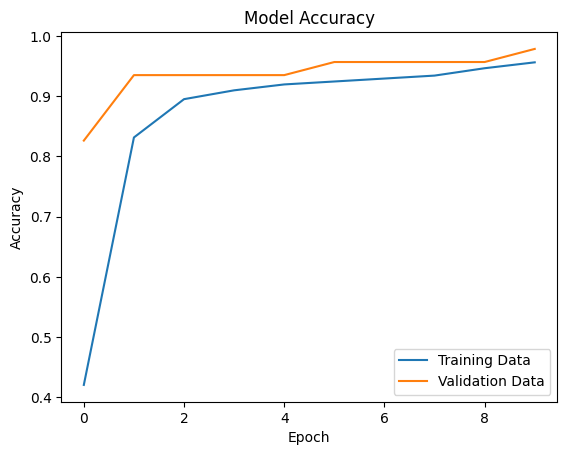

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Hist.history['accuracy'])
plt.plot(Hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

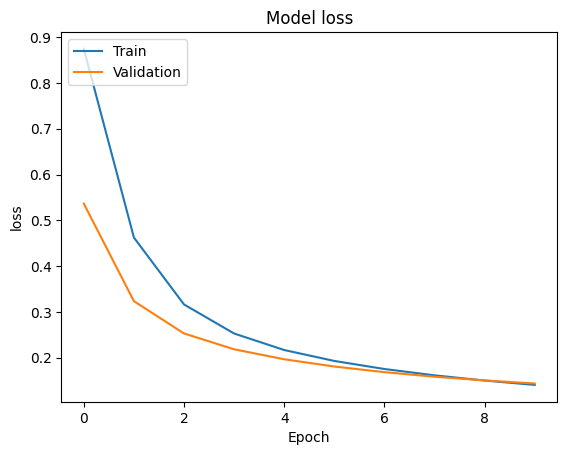

In [ ]:
plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

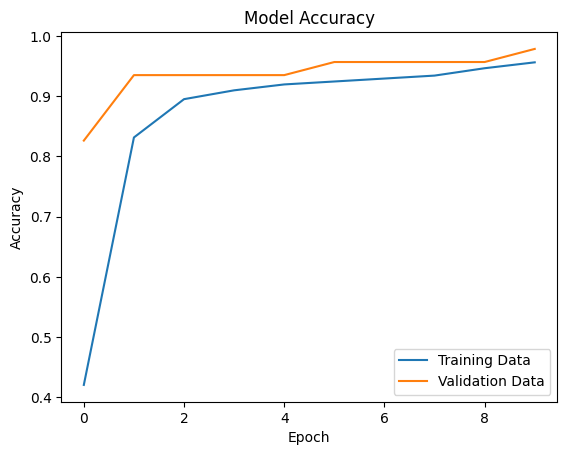

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Hist.history['accuracy'])
plt.plot(Hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

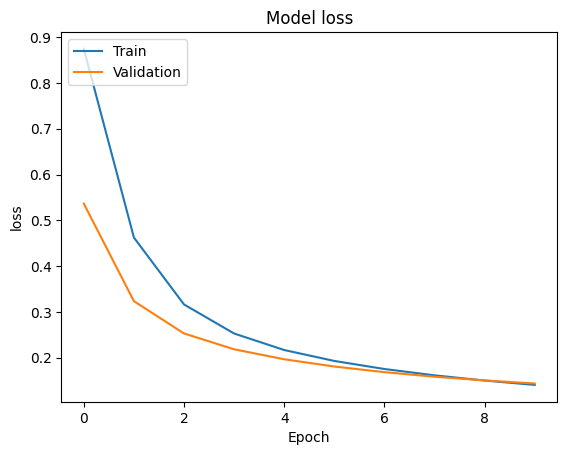

In [ ]:
plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Accuracy of the model on the bases of test data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9641 - loss: 0.1277 
Test Loss: 0.12270619720220566
Test Accuracy: 0.9649122953414917


In [ ]:
# First Command shows the rows and columns of x test dataset
# Second Command shows an array for 30 floating point numbers after standardized scaler for each column
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [ ]:
# Asking model to predict for our test dataset
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
# Here we are getting two values which shows probablity as how much percent thinks it should be 0 and how much thinks it should be 1 for the point of x test first sample
# So the model shows that for 46% sure for 0 , for 1 = 56% sure as we need in our target value

print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.6908298  0.33275667]


In [ ]:
# Converting the prediction probablity to labels which are (0: Benign , 1:Malign )
# Here we are getting two values which shows probablity as how much percent thinks it should be 0 and how much thinks it should be 1

Y_pred_labels = [1 if x[1] > 0.5 else 0 for x in Y_pred]
print(Y_pred_labels)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [ ]:
# Building the Predictive System
input_data = (12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075)

# input data as an array
input_data_as_np_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

# standardising the input data
input_data_std = sc.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_Label = [np.argmax(prediction)]
print(prediction_Label)

if(prediction_Label[0] == 0):
  print('The Breast Cancer is Malignant')
else:
  print('The Breast Cancer is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.29906756 0.97644913]]
[np.int64(1)]
The Breast Cancer is Benign


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
